In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [43]:
# Read the CSV file
df = pd.read_csv('large_employee_data.csv')
print("Original DataFrame:")
print(df.head())


Original DataFrame:
    ID              Name  Age Department  Salary
0  497  Charlie Martinez   45         IT   39866
1  395       Diana Smith   49    Finance   73108
2  590       Diana Davis   41    Finance   76486
3  918     Charlie Jones   58         HR   36971
4  654  George Rodriguez   26  Marketing  103445


In [45]:
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1050 non-null   int64 
 1   Name        1026 non-null   object
 2   Age         1050 non-null   int64 
 3   Department  1050 non-null   object
 4   Salary      1050 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 41.1+ KB
None


In [3]:
# 1. Handling missing values
print("\n1. Handling missing values:")
df['Name'] = df['Name'].fillna('Unknown')
print(df.isnull().sum())


1. Handling missing values:
ID            0
Name          0
Age           0
Department    0
Salary        0
dtype: int64


In [4]:
# 2. Handling duplications
print("\n2. Handling duplications:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df_no_dupes = df.drop_duplicates(subset=df.columns.difference(['ID']))
print(f"Number of rows after removing duplicates: {len(df_no_dupes)}")


2. Handling duplications:
Number of duplicate rows: 0
Number of rows after removing duplicates: 1000


In [5]:
# 3. Handling Outliers
print("\n3. Handling Outliers:")


3. Handling Outliers:


In [49]:
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.savefig(f'{column}_boxplot.png')
    plt.plot()

In [51]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [53]:
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

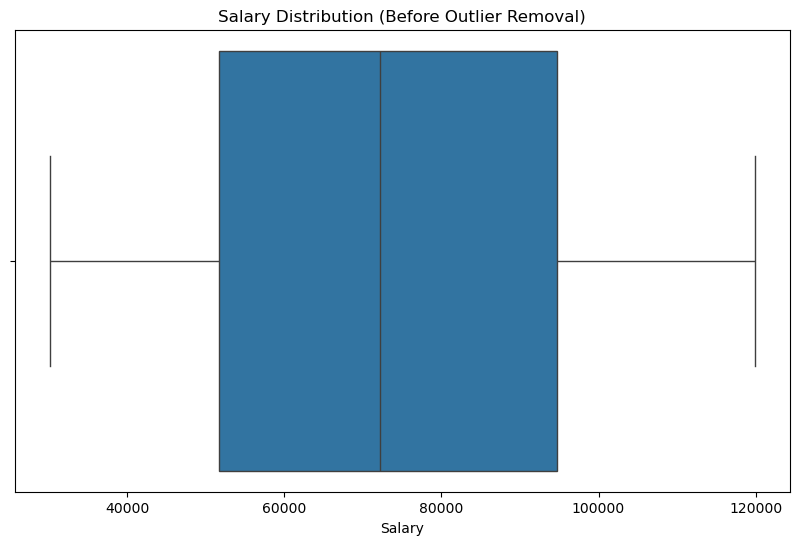

In [55]:
# Detect and visualize outliers for Salary
plot_boxplot(df_no_dupes, 'Salary', 'Salary Distribution (Before Outlier Removal)')
salary_outliers_iqr = detect_outliers_iqr(df_no_dupes, 'Salary')
salary_outliers_zscore = detect_outliers_zscore(df_no_dupes, 'Salary')

In [57]:
print(f"Number of salary outliers (IQR method): {len(salary_outliers_iqr)}")
print(f"Number of salary outliers (Z-score method): {len(salary_outliers_zscore)}")

Number of salary outliers (IQR method): 0
Number of salary outliers (Z-score method): 0


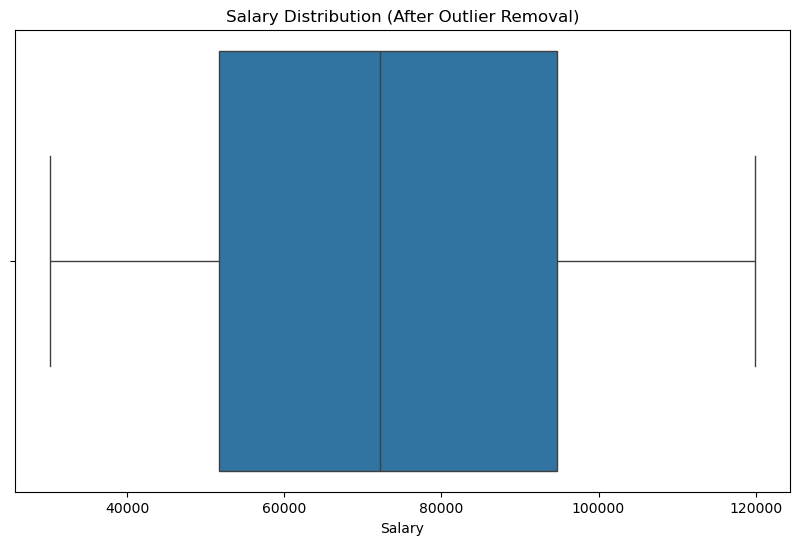

In [59]:
# Remove outliers (using IQR method for this example)
df_no_outliers = df_no_dupes[~df_no_dupes.index.isin(salary_outliers_iqr.index)]
plot_boxplot(df_no_outliers, 'Salary', 'Salary Distribution (After Outlier Removal)')

In [61]:
# 4. Treating skewed data
print("\n4. Treating skewed data:")


4. Treating skewed data:


In [65]:
def plot_distribution(data, column, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    sns.histplot(data[column], kde=True)
    plt.title(f'Original {title}')
    
    plt.subplot(132)
    sns.histplot(np.sqrt(data[column]), kde=True)
    plt.title(f'Square Root Transformed {title}')
    
    plt.subplot(133)
    sns.histplot(np.log1p(data[column]), kde=True)
    plt.title(f'Log Transformed {title}')
    
    plt.tight_layout()
    plt.savefig(f'{column}_transformations.png')
    plt.plot()

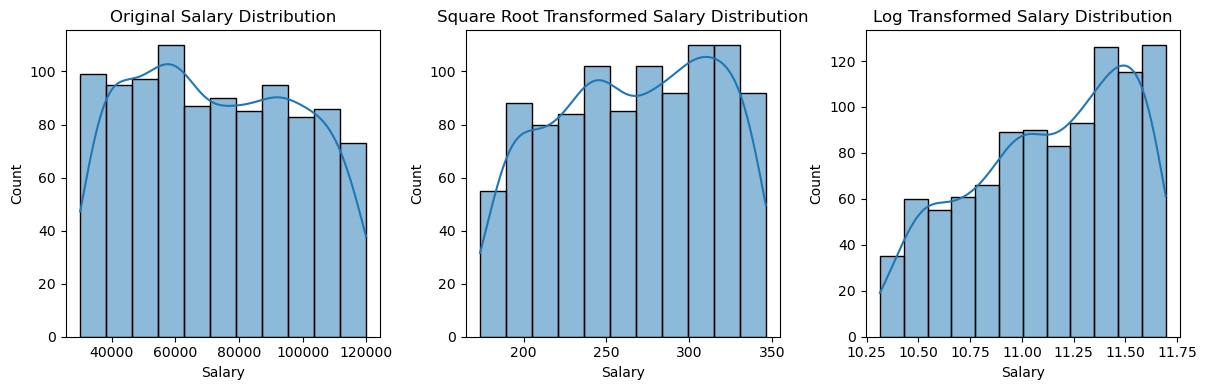

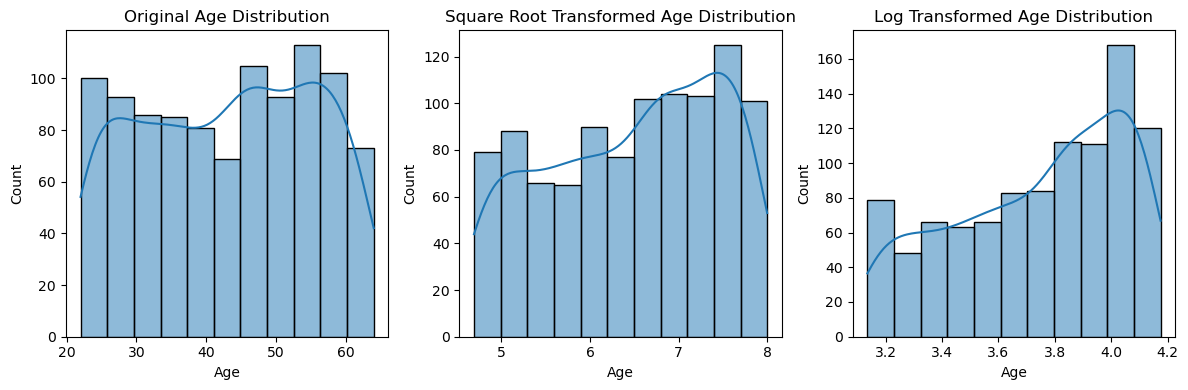

In [67]:
plot_distribution(df_no_outliers, 'Salary', 'Salary Distribution')
plot_distribution(df_no_outliers, 'Age', 'Age Distribution')

In [68]:
# Apply transformations
df_no_outliers['Salary_sqrt'] = np.sqrt(df_no_outliers['Salary'])
df_no_outliers['Salary_log'] = np.log1p(df_no_outliers['Salary'])
df_no_outliers['Age_sqrt'] = np.sqrt(df_no_outliers['Age'])
df_no_outliers['Age_log'] = np.log1p(df_no_outliers['Age'])

In [71]:
# 5. Additional preprocessing
print("\n5. Additional preprocessing:")
df_no_outliers['Name'] = df_no_outliers['Name'].str.title()
df_no_outliers['Salary_Category'] = pd.cut(df_no_outliers['Salary'], 
                                           bins=[0, 50000, 80000, float('inf')],
                                           labels=['Low', 'Medium', 'High'])
df_no_outliers['Age_Group'] = pd.cut(df_no_outliers['Age'], 
                                     bins=[0, 30, 45, float('inf')],
                                     labels=['Young', 'Middle', 'Senior'])


5. Additional preprocessing:


In [73]:
# 6. Export the preprocessed data
df_no_outliers.to_csv('preprocessed_large_employee_data.csv', index=False)
print("\nPreprocessed data has been exported to 'preprocessed_large_employee_data.csv'")


Preprocessed data has been exported to 'preprocessed_large_employee_data.csv'


In [75]:
# 7. Basic data analysis
print("\n7. Basic data analysis:")
print(df_no_outliers.describe())



7. Basic data analysis:
                ID          Age        Salary  Salary_sqrt   Salary_log  \
count  1000.000000  1000.000000    1000.00000  1000.000000  1000.000000   
mean    530.500000    43.014000   73117.68000   266.044233    11.132682   
std     347.948729    12.333772   25532.60997    48.378574     0.377448   
min       1.000000    22.000000   30162.00000   173.672105    10.314371   
25%     251.750000    32.000000   51665.25000   227.299909    10.852560   
50%     510.500000    44.000000   72189.50000   268.680976    11.187063   
75%     771.250000    54.000000   94663.75000   307.674740    11.458097   
max    1990.000000    64.000000  119881.00000   346.238357    11.694263   

          Age_sqrt      Age_log  
count  1000.000000  1000.000000  
mean      6.486779     3.741404  
std       0.967796     0.301529  
min       4.690416     3.135494  
25%       5.656854     3.496508  
50%       6.633250     3.806662  
75%       7.348469     4.007333  
max       8.000000     4.17

In [77]:
print("\nAverage salary by department:")
print(df_no_outliers.groupby('Department')['Salary'].mean())


Average salary by department:
Department
Finance       71147.766467
HR            69626.420118
IT            74286.000000
Marketing     74305.677019
Operations    74946.092593
Sales         74477.508671
Name: Salary, dtype: float64


[]

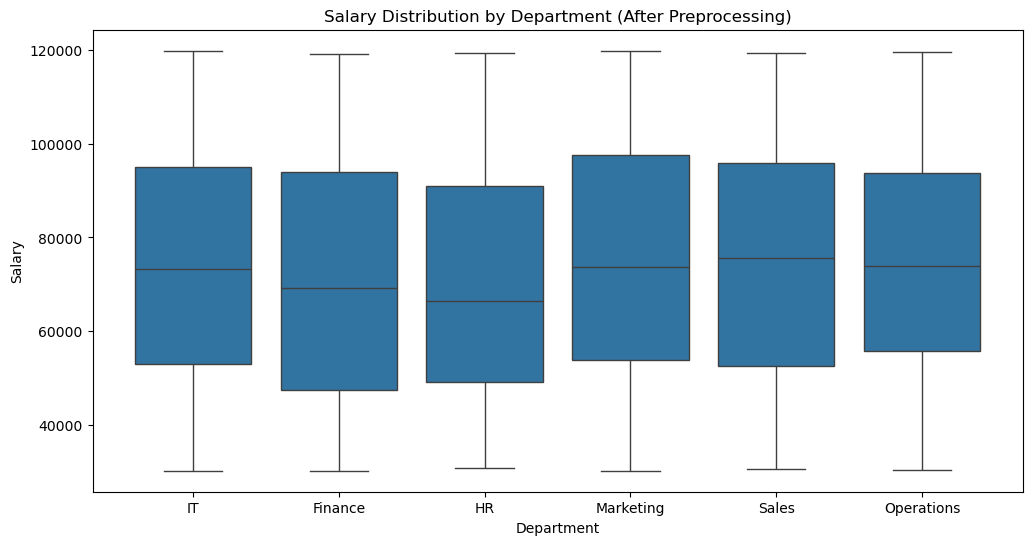

In [79]:
# 8. Data Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df_no_outliers)
plt.title('Salary Distribution by Department (After Preprocessing)')
plt.savefig('salary_distribution_final.png')
plt.plot()

[]

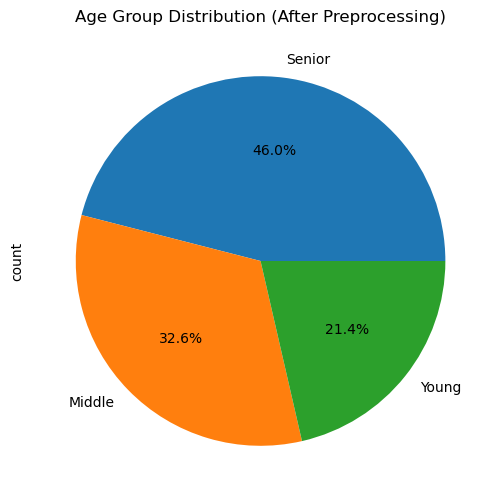

In [81]:
plt.figure(figsize=(10, 6))
df_no_outliers['Age_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Group Distribution (After Preprocessing)')
plt.savefig('age_group_distribution_final.png')
plt.plot()

In [83]:
print("\nData visualizations have been saved as PNG files.")


Data visualizations have been saved as PNG files.
